In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Plot of MRR

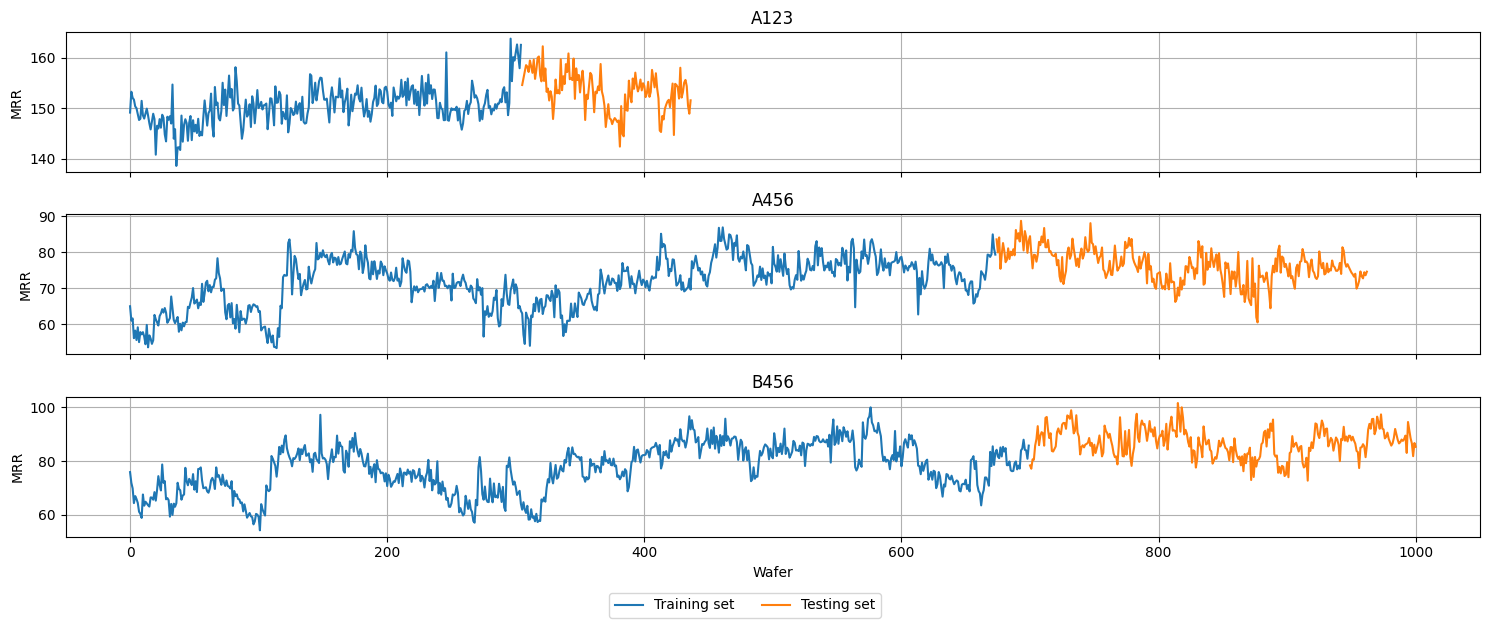

In [9]:
# load the data
train_A123 = pd.read_csv('./A123/train.csv')
test_A123 = pd.read_csv('./A123/test.csv')

train_A456 = pd.read_csv('./A456/train.csv')
test_A456 = pd.read_csv('./A456/test.csv')

train_B456 = pd.read_csv('./B456/train.csv')
test_B456 = pd.read_csv('./B456/test.csv')

# extract the MRR
def extract_MRR(data, interval=316):
    return [data['MRR'][i] for i in range(0, len(data), interval)]

train_MRR_A123 = extract_MRR(train_A123)
test_MRR_A123 = extract_MRR(test_A123)

train_MRR_A456 = extract_MRR(train_A456)
test_MRR_A456 = extract_MRR(test_A456)

train_MRR_B456 = extract_MRR(train_B456)
test_MRR_B456 = extract_MRR(test_B456)

# create the plot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 6), dpi=100, sharex=True)

# A123
axes[0].plot(range(len(train_MRR_A123)), train_MRR_A123)
axes[0].plot(range(len(train_MRR_A123), len(train_MRR_A123) + len(test_MRR_A123)), test_MRR_A123)
axes[0].set_title('A123')
axes[0].set_ylabel('MRR')
axes[0].grid(True)

# A456
axes[1].plot(range(len(train_MRR_A456)), train_MRR_A456)
axes[1].plot(range(len(train_MRR_A456), len(train_MRR_A456) + len(test_MRR_A456)), test_MRR_A456)
axes[1].set_title('A456')
axes[1].set_ylabel('MRR')
axes[1].grid(True)

# B456
axes[2].plot(range(len(train_MRR_B456)), train_MRR_B456)
axes[2].plot(range(len(train_MRR_B456), len(train_MRR_B456) + len(test_MRR_B456)), test_MRR_B456)
axes[2].set_title('B456')
axes[2].set_xlabel('Wafer')
axes[2].set_ylabel('MRR')
axes[2].grid(True)

# add the single legend
fig.legend(['Training set', 'Testing set'], loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.05))
# set the layout
plt.tight_layout()
plt.show()

Plot of SVID

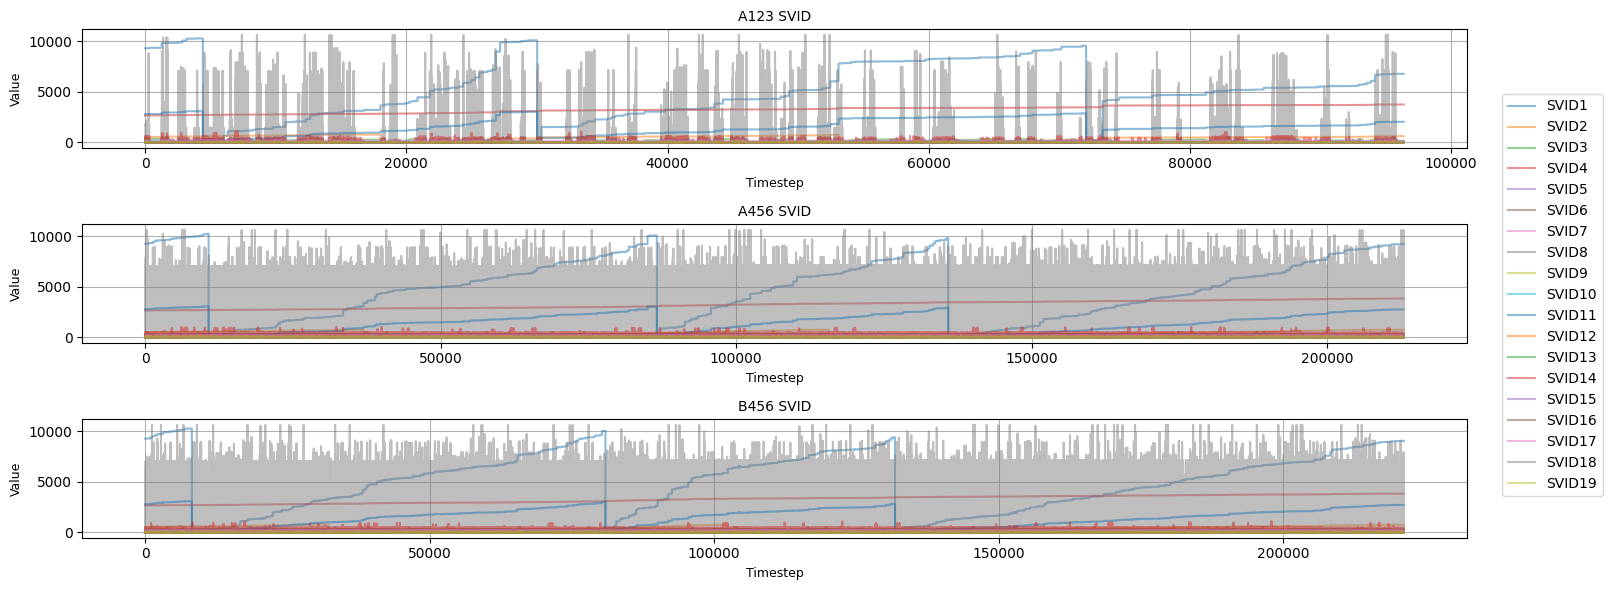

In [10]:
def plot_multiple_datasets(datasets, titles, cmap='Pastel1'):
    plt.figure(figsize=(15, 6))
    num_datasets = len(datasets)
    
    # plot the SVID of each sub-datasets
    for i, (data, title) in enumerate(zip(datasets, titles), start=1):
        plt.subplot(num_datasets, 1, i)
        for j, column in enumerate(data.columns):
            plt.plot(data[column], label=f'SVID{j+1}', alpha=0.5)
        plt.title(title, fontsize=10)
        plt.xlabel('Timestep', fontsize=9)
        plt.ylabel('Value', fontsize=9)
        plt.grid(True)
    
    # create the signal legend 
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.figlegend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.tight_layout()
    plt.show()

# retain only the SVID columns
datasets = [train_A123.iloc[:, 1:-1], train_A456.iloc[:, 1:-1], train_B456.iloc[:, 1:-1]]
titles = ['A123 SVID', 'A456 SVID', 'B456 SVID']
plot_multiple_datasets(datasets, titles)